## Sequences of hardly predictable numbers
## The logistic map

Numerical algorithms are necessarily deterministic. However, it is possible to write algorithms that generate sequences of numbers for which it is difficult to predict the next value in a sequence given the preceding values. This happens when the sequences depend on an initial value $x_0$ with respect to which the subsequent values are strongly dependent.

We are often used to knowing sequences that have regular trends. Below is an example, without giving a rigorous treatment, in which <strong>a parameter $r$ regulates the transition from a regular trend to a progressively more complex trend, until it becomes practically unpredictable.<strong>

The example is given by the so-called logistic map, in which, starting from an initial number $x_0$, the subsequent values are obtained as:

$x_{n+1} = r x_n (1-x_n)$

Where $r$ is a parameter that varies from 0 to 4.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
def logistic(x, r):
    return r*x*(1-x)

In [6]:
def plot_logistic_sequence(x0, r, nn = 101, st='-o'):
    x = x0
    px = []
    py = []
    for n in range(nn):
        px.append(n)
        py.append(x)
        x = logistic(x,r)
    fig = plt.figure(figsize=(10,4))
    plt.plot(px, py, st)
    plt.xlabel('n', size=14)
    plt.ylabel('x(n)', size=14)
    plt.grid()
    print("x(",n,")=",x)

For small values of r, the sequence converges to a fixed value. For $r<1$, the sequence in particular converges to zero.



x( 100 )= 1.73398304250005e-06


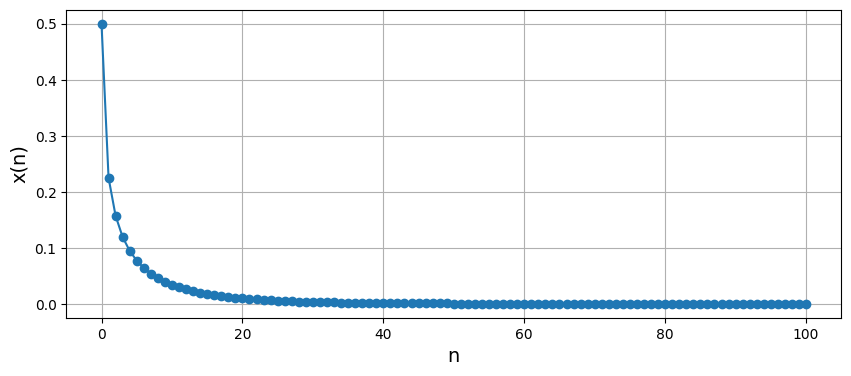

In [7]:
plot_logistic_sequence(0.5,0.9)

For $r>1$, there exist fixed values of the sequence, which are the values that solve the following equation:

$x = r x (1-x)$

For example, for $r=2.2$, it can be numerically verified that the value is 0.545454...

In [8]:
1-1/2.2

0.5454545454545454

x( 100 )= 0.5454545454545455


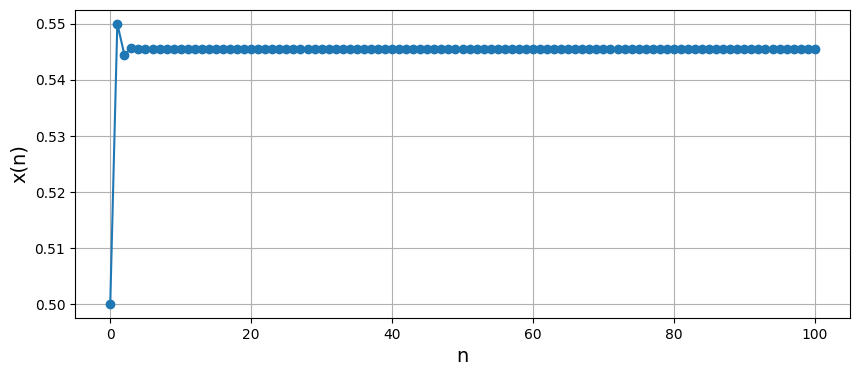

In [9]:
plot_logistic_sequence(0.5,2.2)

For $r=3.2$, however, it can be seen that the sequence oscillates between two values. The previously discussed fixed value becomes unstable, while the sequence tends towards the pair of values that solve the following system:

$\displaystyle\left\{
\begin{array}{lll}
x_1 & = & r x_2 (1-x_2)\\
x_2 & = & r x_1 (1-x_1)
\end{array}
\right.
$

x( 100 )= 0.7994554904673701


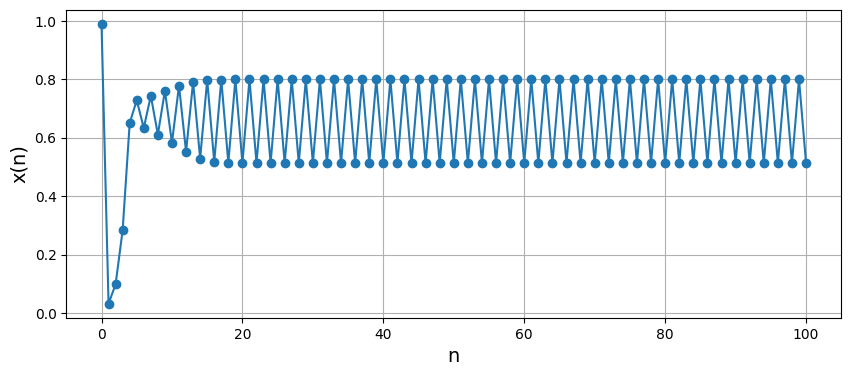

In [10]:
plot_logistic_sequence(0.99,3.2)

For $r=3.55$ the sequence oscillates between 4 values

x( 100 )= 0.5060304916180989


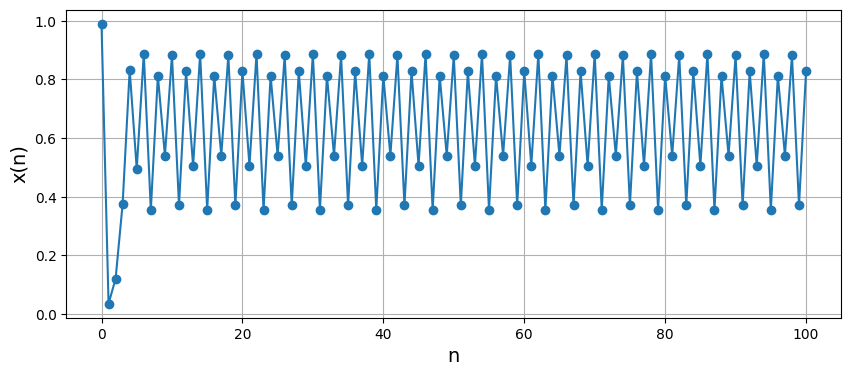

In [11]:
plot_logistic_sequence(0.99,3.55)

For $r=3.9999$ the behavior is very irregular.

x( 399 )= 0.5513949960689734


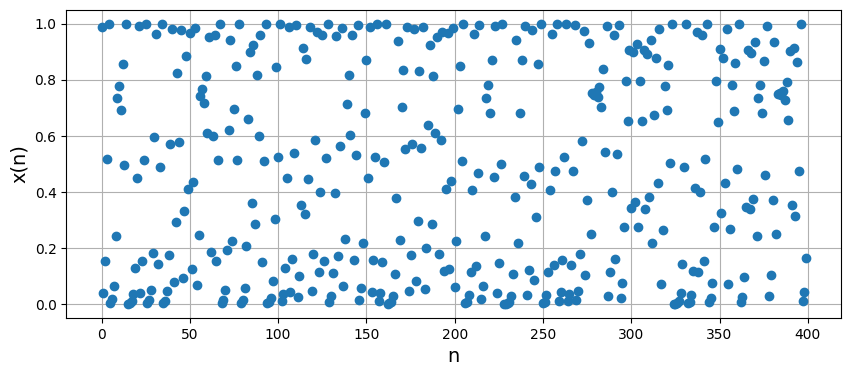

In [14]:
plot_logistic_sequence(0.99,3.9999,400, st='o')

As $r$ varies, the sequence changes its behavior:
- initially, it converges to a fixed value;
- then, it oscillates between two values, then 4, 8, 16, etc.;
- for some values of $r$, it no longer follows a regular pattern, and the values are difficult to predict.

In [17]:
def plot_logistic_map(r1=1, r2=3.99999, nsteps=1000, discard=200, points=200, x0=0.5):
    step = (r2-r1)/nsteps
    px = []
    py = []
    for r in np.arange(r1,r2,step):
        x = x0
        for i in range(points+discard):
            x = logistic(x,r)
            if i > discard:
                px.append(r)
                py.append(x)
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(px, py, marker='.', s=0.5, alpha=0.2)
    plt.xlabel('r', size=14)
    plt.ylabel('x(n) : n>200', size=14)

- r1 and r2: the starting and ending values of $r$ to use for generating the sequence;
- nsteps: the number of steps between r1 and r2;
- discard: the number of points to discard at the beginning of the sequence;
- points: the number of points in the sequence to plot on the graph;
- x0: the initial value of $x$ for generating the sequence.

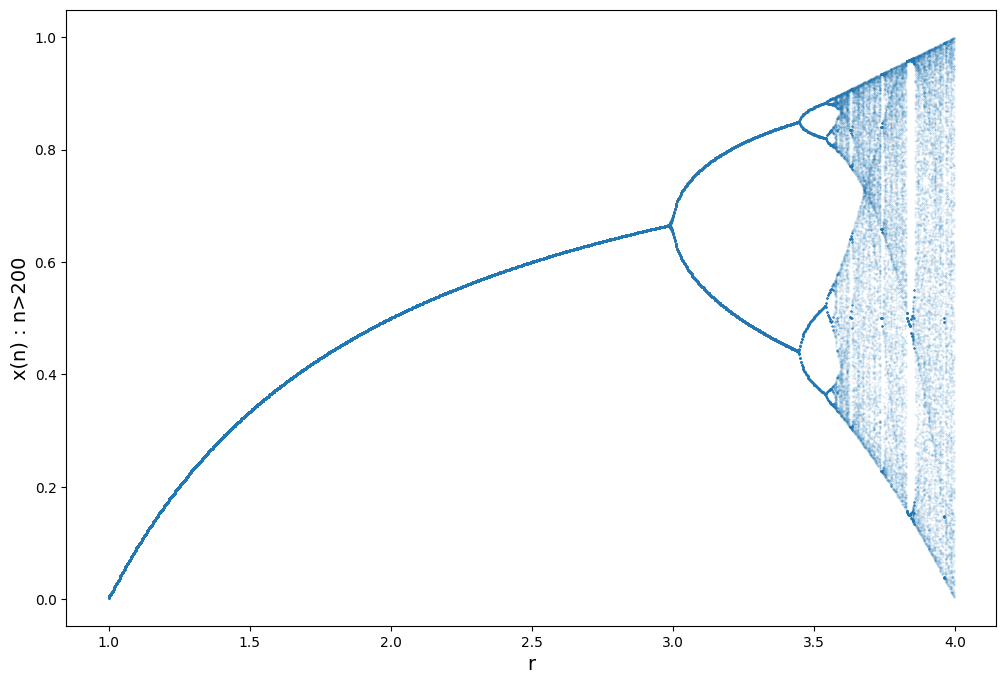

In [18]:
plot_logistic_map()

for $r=4.0$, values densely fills the interval $[0,1]$.

It can be proved that the *density* $\rho(x)$, of the first $N$ values ​​$x_i$ tends, for $N\rightarrow\infty$, to:

$\displaystyle\rho(x)= \frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x} = f(x) = \frac{C}{\sqrt{ x(1-x)}}\,,$

where $C=1/\pi$ is the normalization coefficient

In [19]:
seq=[]
r=4
x = 0.34567
for i in range(100000):
    seq.append(x)
    x=logistic(x, r)

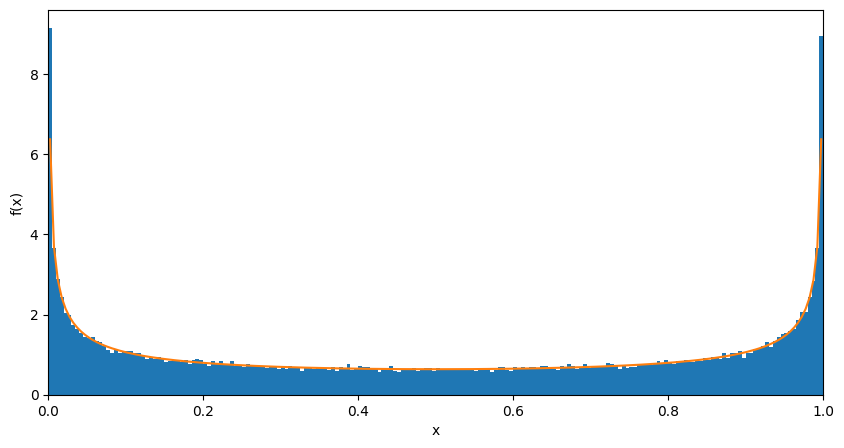

In [20]:
nbins=200
delta=1/nbins
x = np.arange(0+delta/2,1+delta/2,delta)
y = np.ones_like(x)/np.sqrt(x*(1-x))
y/=math.pi

plt.figure(figsize=(10,5))
plt.hist(seq, nbins, density=True)
plt.plot(x, y)
plt.xlim(0, 1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()